# Price analysis

This documentation shows the analysis of price data.

## Usage

`def get_stat(currency, to_currency="USD", plot=True)`

Get the monthly stats of a currency in DataFrame. Plotting the curve is optional.

In [1]:
from datetime import datetime, date
from pandas import DataFrame as df
from pandas import read_csv
import matplotlib.pyplot as plt

DATA_DIR = "../cleaned_data"

In [2]:
import fnmatch
import os

def match_file(directory, pattern):
    for file in os.listdir(directory):
        if fnmatch.fnmatch(file, pattern):
            return file
    return None

In [3]:
match_file("../cleaned_data/", "BTC_USD*")

'BTC_USD_4242.csv'

In [4]:
def load_price(currency, to_currency) -> df:
    file = match_file(DATA_DIR, f"{currency}_{to_currency}*")
    if file is None:
        return None
    
    data = read_csv(f"{DATA_DIR}/{file}")
    return data.drop(data.columns[[0, 1]], axis=1)

In [5]:
price_data = load_price("BTC", "USD")

In [6]:
# date format: "YYYY-MM-DD"
# Return: open, close, diff, %diff
def get_period_stat_from_df(data, start_date, end_date):
    start_row = data[data.date == start_date]
    end_row = data[data.date == end_date]
    open_price = start_row["open"].values[0]
    close_price = end_row["open"].values[0]
    diff_value = close_price - open_price
    diff_percentage = diff_value / open_price
    return open_price, close_price, diff_value, diff_percentage

In [7]:
get_period_stat_from_df(price_data, "2022-01-01", "2022-03-01")

(46197.31, 43189.46, -3007.8499999999985, -0.0651087693201184)

In [8]:
def get_month_stat_from_df(data, year, month):
    start_date = f"{year}-{month:#02d}-01"
    if month == 12:
        end_date = f"{year+1}-01-01"
    else:
        end_date = f"{year}-{month+1:#02d}-01"
    try:
        return (year, month) + get_period_stat_from_df(data, start_date, end_date)
    except:
        return None

In [9]:
get_month_stat_from_df(price_data, 2020, 1)

(2020, 1, 7183.88, 9342.23, 2158.3499999999995, 0.3004434929313963)

In [10]:
def get_all_monthly_stat_from_df(data, start_year = 2009, start_month = 1, end_year = 2022, end_month = 3):
    res = []
    year = start_year
    month = start_month
    while year*100+month <= end_year*100+end_month:
        stat = get_month_stat_from_df(data, year, month)
        if stat is not None:
            res.append(stat)
        year += month // 12
        month = (month) % 12 + 1
    return res

In [11]:
get_all_monthly_stat_from_df(price_data)

[(2010, 8, 0.06785, 0.06, -0.007849999999999996, -0.11569638909358874),
 (2010, 9, 0.06, 0.0619, 0.001899999999999999, 0.03166666666666665),
 (2010, 10, 0.0619, 0.1925, 0.1306, 2.109854604200323),
 (2010, 11, 0.1925, 0.2082, 0.015699999999999992, 0.08155844155844151),
 (2010, 12, 0.2082, 0.3, 0.09179999999999999, 0.44092219020172907),
 (2011, 1, 0.3, 0.52, 0.22000000000000003, 0.7333333333333335),
 (2011, 2, 0.52, 0.86, 0.33999999999999997, 0.6538461538461537),
 (2011, 3, 0.86, 0.7846, -0.07540000000000002, -0.0876744186046512),
 (2011, 4, 0.7846, 3.5, 2.7154, 3.460871781799643),
 (2011, 5, 3.5, 8.741, 5.241, 1.4974285714285713),
 (2011, 6, 8.741, 16.1, 7.359000000000002, 0.8418945200777945),
 (2011, 7, 16.1, 13.35, -2.7500000000000018, -0.17080745341614917),
 (2011, 8, 13.35, 8.2, -5.15, -0.38576779026217234),
 (2011, 9, 8.2, 5.14, -3.0599999999999996, -0.37317073170731707),
 (2011, 10, 5.14, 3.248, -1.8919999999999995, -0.3680933852140077),
 (2011, 11, 3.248, 2.97, -0.278, -0.0855911

In [12]:
def create_stat_df(res):
    return df(res, columns=["year", "month", "open", "close", "diff", "diff_percentage"])

In [13]:
create_stat_df(get_all_monthly_stat_from_df(price_data))

,year,month,open,close,diff,diff_percentage
0,2010,8,0.06785,0.0600,-0.00785,-0.115696
1,2010,9,0.06000,0.0619,0.00190,0.031667
2,2010,10,0.06190,0.1925,0.13060,2.109855
3,2010,11,0.19250,0.2082,0.01570,0.081558
4,2010,12,0.20820,0.3000,0.09180,0.440922
...,...,...,...,...,...,...
134,2021,10,43829.34000,61349.7500,17520.41000,0.399742
135,2021,11,61349.75000,56975.3500,-4374.40000,-0.071303
136,2021,12,56975.35000,46197.3100,-10778.04000,-0.189170
137,2022,1,46197.31000,38494.6600,-7702.65000,-0.166734


In [14]:
# Use this function

def get_stat(currency, to_currency="USD", plot=True, save_dir="../milestones/images"):
    data = load_price(currency, to_currency)
    stat = create_stat_df(get_all_monthly_stat_from_df(data))
    dates = stat[["year", "month"]].apply(lambda x: datetime(year=x["year"], month=x["month"], day=1), axis=1)
    if plot:
        plt.figure(facecolor="white")
        plt.plot(dates, stat["diff_percentage"]*100)
        
        plt.title(f"{currency} -> {to_currency} monthly changes")
        plt.xlabel("date")
        plt.ylabel("percentage %")
        plt.axhline(y=0, color='r', linestyle='--')
        plt.savefig(f"{save_dir}/{currency}-price-analysis.png")
    return stat

,year,month,open,close,diff,diff_percentage
0,2010,8,0.06785,0.0600,-0.00785,-0.115696
1,2010,9,0.06000,0.0619,0.00190,0.031667
2,2010,10,0.06190,0.1925,0.13060,2.109855
3,2010,11,0.19250,0.2082,0.01570,0.081558
4,2010,12,0.20820,0.3000,0.09180,0.440922
...,...,...,...,...,...,...
134,2021,10,43829.34000,61349.7500,17520.41000,0.399742
135,2021,11,61349.75000,56975.3500,-4374.40000,-0.071303
136,2021,12,56975.35000,46197.3100,-10778.04000,-0.189170
137,2022,1,46197.31000,38494.6600,-7702.65000,-0.166734


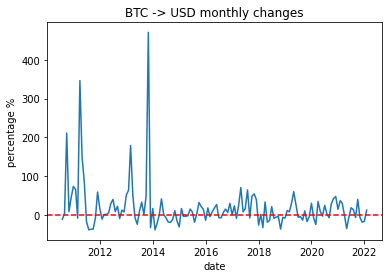

In [15]:
stat = get_stat("BTC", "USD")
stat

In [16]:
list_currencies = [
    "BTC", "ETH", "USDT", "USDC", "XRP", "LUNA", "SOL", "ADA", "AVAX", "DOT",
    "DOGE", "UST", "SHIB", "WBTC", "MATIC", "CRO", "DAI", "ATOM", "LTC", "NEAR",
    "LINK", "TRX", "BCH", "LEO", "ALGO", "OKB", "XLM", "FTM", "HBAR", "UNI"
]

/var/folders/ql/h_pgv6511yscq_3b_v0dq4rm0000gn/T/ipykernel_51850/2007868081.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(facecolor="white")


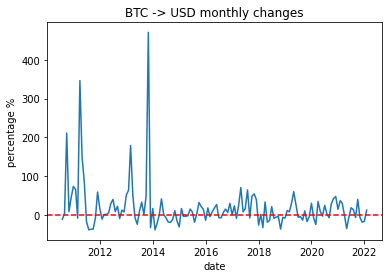

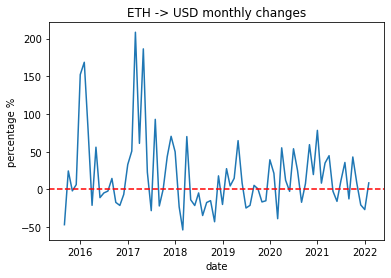

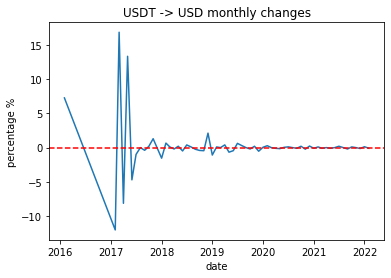

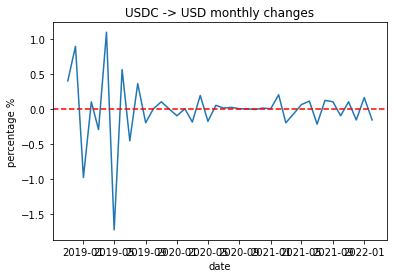

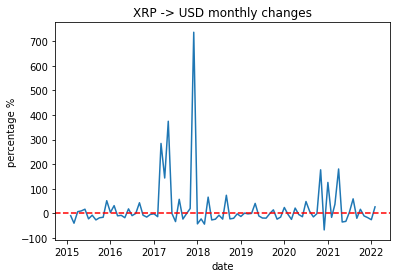

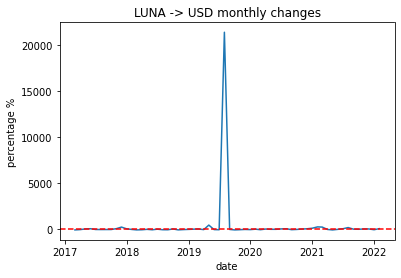

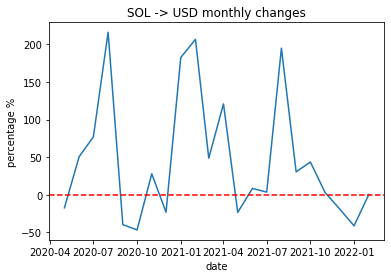

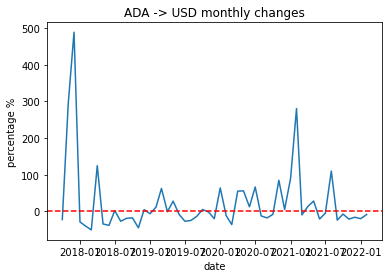

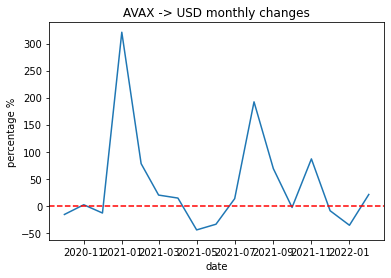

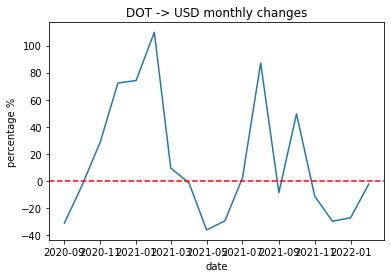

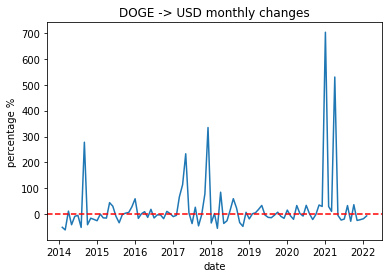

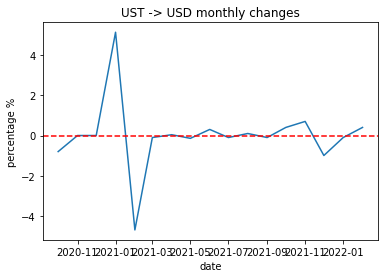

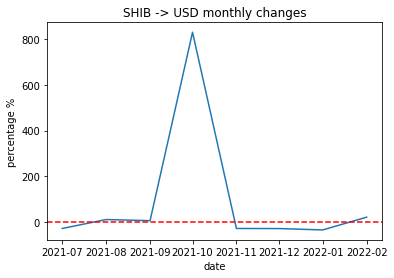

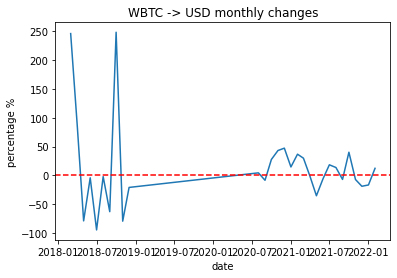

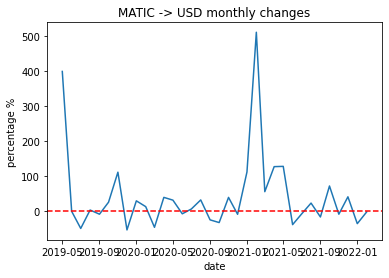

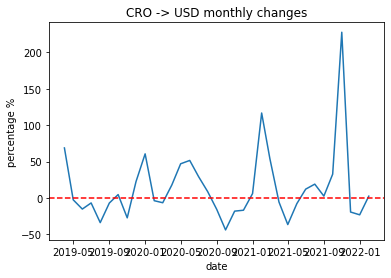

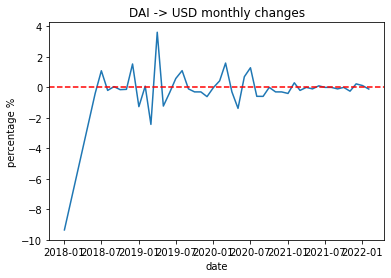

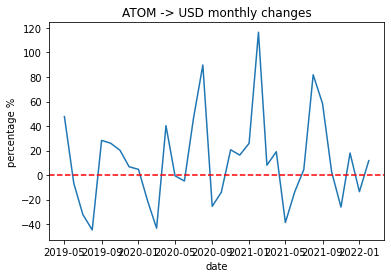

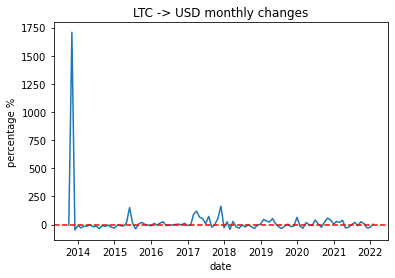

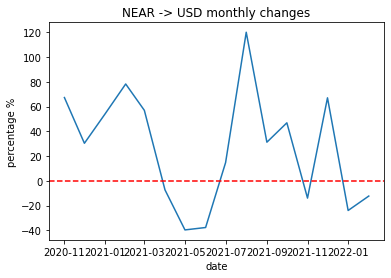

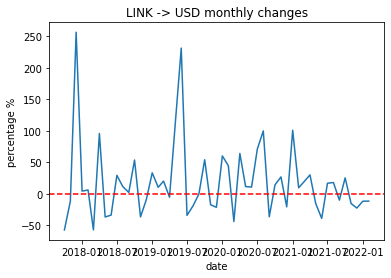

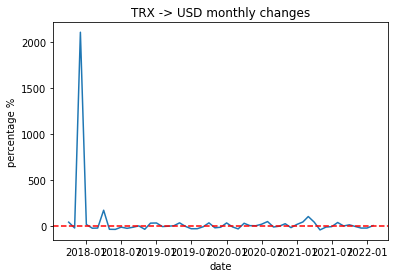

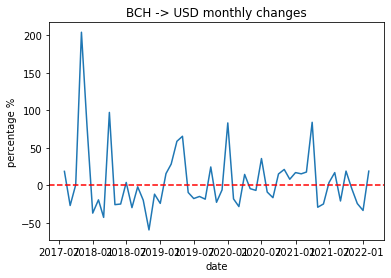

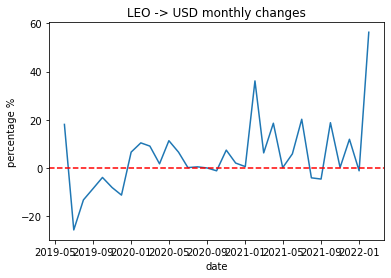

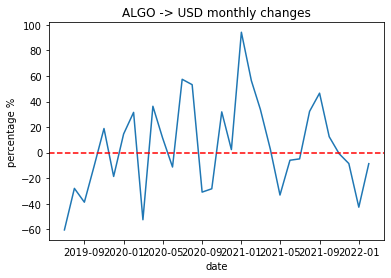

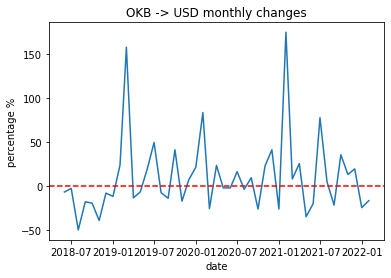

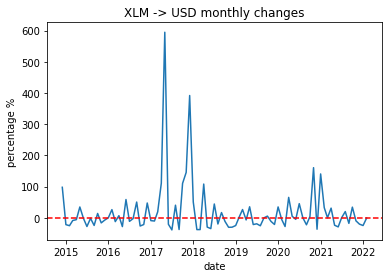

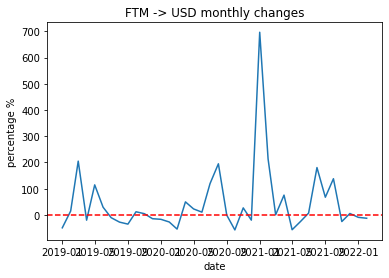

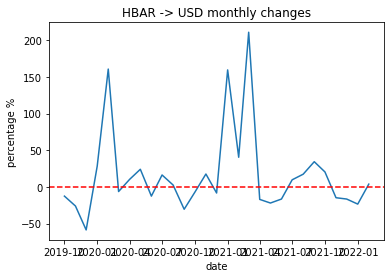

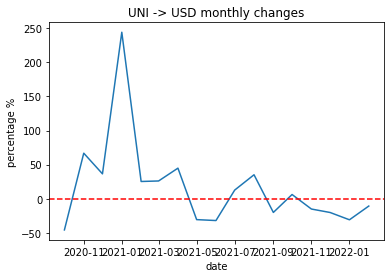

In [17]:
for currency in list_currencies:
    get_stat(currency)